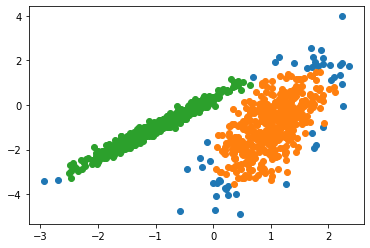

In [1]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2,
n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
# create scatter of these samples
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=23)
# For simplicity, we are going to use as base estimator a Decision Tree with
#fixed parameters
tree = DecisionTreeClassifier(max_depth=3, random_state=23)
# The baggging ensemble classifier is initialized with:
# base_estimator = DecisionTree
# n_estimators = 5 : it's gonna be created 5 subsets to train 5 Decision Tree
#models
# max_samples = 50 : it's gonna be taken randomly 50 items with replacement
# bootstrap = True : means that the sampling is gonna be with replacement
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5,max_samples=50, bootstrap=True)
# Training
bagging.fit(x_train, y_train)
# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

Train score: 0.9178403755868545
Test score: 0.9300699300699301


In [3]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=23)
# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)
# AdaBoost initialization
# It's defined the decision tree as the base learner
# The number of estimators will be 5
# The penalizer for the weights of each estimator is 0.1
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5,
learning_rate=0.1, random_state=23)
# Train!
adaboost.fit(x_train, y_train)
# Evaluation
print(f"Train score: {adaboost.score(x_train, y_train)}")
print(f"Test score: {adaboost.score(x_test, y_test)}")


Train score: 0.9694835680751174
Test score: 0.958041958041958
